# Scenario 1: A 2-headed coin

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo import Die, Game, Analyzer

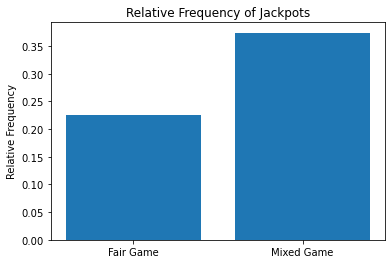

In [4]:
# 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
fair_coin = Die(["H", "T"])
unfair_coin = Die(["H", "T"])
unfair_coin.set_weight("H", 5)

# 2. Play a game of 1000 flips with all fair dice.
fair_game = Game([fair_coin] * 3)
fair_game.play(1000)

# 3. Play a game of 1000 flips with two unfair dice and one fair die.
mixed_game = Game([unfair_coin, unfair_coin, fair_coin])
mixed_game.play(1000)

# 4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
fair_analyzer = Analyzer(fair_game)
mixed_analyzer = Analyzer(mixed_game)

fair_jackpot_count = fair_analyzer.jackpot()
mixed_jackpot_count = mixed_analyzer.jackpot()

# 5. Compute relative frequency as the number of jackpots over the total number of rolls.
fair_relative_frequency = fair_jackpot_count / 1000
mixed_relative_frequency = mixed_jackpot_count / 1000

# 6. Show your results, comparing the two relative frequencies, in a simple bar chart.
labels = ['Fair Game', 'Mixed Game']
relative_frequencies = [fair_relative_frequency, mixed_relative_frequency]

plt.bar(labels, relative_frequencies)
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Jackpots')
plt.show()

# Scenario 2: A 6-sided die

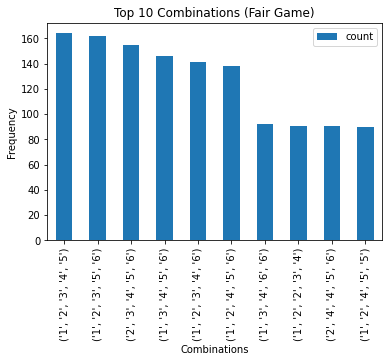

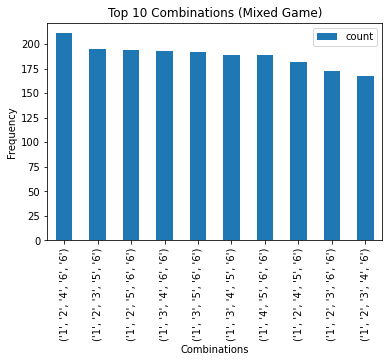

In [5]:
# 1. Create fair die and unfair dice
fair_die = Die(list(range(1, 7)))

unfair_die_type1 = Die(list(range(1, 7)))
unfair_die_type1.set_weight(6, 5)

unfair_die_type2 = Die(list(range(1, 7)))
unfair_die_type2.set_weight(1, 5)

# 2. Play a game of 10000 rolls with 5 fair dice
fair_game = Game([fair_die] * 5)
fair_game.play(10000)

# 3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice
mixed_game = Game([unfair_die_type1] * 2 + [unfair_die_type2] + [fair_die] * 2)
mixed_game.play(10000)

# 4. Analyze the results and compare the relative frequencies of jackpots
fair_analyzer = Analyzer(fair_game)
mixed_analyzer = Analyzer(mixed_game)

fair_jackpots = fair_analyzer.jackpot()
mixed_jackpots = mixed_analyzer.jackpot()

# 5. Compute the 10 most frequent combinations of faces for each game
fair_analyzer.combo()
mixed_analyzer.combo()

fair_top_combos = fair_analyzer.combo_results.nlargest(10, 'count').reset_index()
mixed_top_combos = mixed_analyzer.combo_results.nlargest(10, 'count').reset_index()

fair_top_combos['outcome'] = fair_top_combos['outcome'].apply(lambda x: str(x))
mixed_top_combos['outcome'] = mixed_top_combos['outcome'].apply(lambda x: str(x))

# Plot the results
fair_top_combos.plot(kind='bar', x='outcome', y='count', title='Top 10 Combinations (Fair Game)')
plt.xlabel('Combinations')
plt.ylabel('Frequency')
plt.show()

mixed_top_combos.plot(kind='bar', x='outcome', y='count', title='Top 10 Combinations (Mixed Game)')
plt.xlabel('Combinations')
plt.ylabel('Frequency')
plt.show()

# Scendario 3: Letters of the Roman Alpha

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a die with letters from a to z and weights based on their frequency of usage
letter_frequencies = {'a': 8.4966, 'b': 2.0720, 'c': 4.5388, 'd': 3.3844, 'e': 11.1607, 'f': 1.8121,
                      'g': 2.4705, 'h': 3.0034, 'i': 7.5448, 'j': 0.1965, 'k': 1.1016, 'l': 5.4893,
                      'm': 3.0129, 'n': 6.6544, 'o': 7.1635, 'p': 3.1671, 'q': 0.1962, 'r': 7.5809,
                      's': 5.7351, 't': 6.9509, 'u': 3.6308, 'v': 1.0074, 'w': 1.2899, 'x': 0.2902,
                      'y': 1.7779, 'z': 0.2722}

letter_die = Die(list(letter_frequencies.keys()))
for letter, freq in letter_frequencies.items():
    letter_die.set_weight(letter, freq)

# 2. Play a game involving 5 of these dice with 1000 rolls
letter_game = Game([letter_die] * 5)
letter_game.play(1000)

# 3. Analyze the results to identify combinations that look like actual English words
letter_analyzer = Analyzer(letter_game)  # Create the letter_analyzer object
letter_analyzer.combo()

# Display the top combinations
top_combos = letter_analyzer.combo_results.reset_index()
print(top_combos.head(20))  # Adjust the number of displayed combinations as needed

# 4. Manually count the number of English words and calculate the relative frequency
english_word_count = 0  # Replace with your manual count

total_combos = top_combos['count'].sum()
relative_frequency = (english_word_count / total_combos) * 100

print(f"Relative frequency of English words: {relative_frequency:.2f}%")

            outcome  count
0   (a, a, a, c, u)      1
1   (a, a, a, d, r)      1
2   (a, a, a, e, f)      1
3   (a, a, a, e, i)      1
4   (a, a, a, k, l)      1
5   (a, a, b, l, m)      1
6   (a, a, c, c, s)      1
7   (a, a, c, d, u)      1
8   (a, a, c, e, n)      1
9   (a, a, c, l, r)      1
10  (a, a, c, l, s)      1
11  (a, a, c, n, t)      1
12  (a, a, c, s, s)      1
13  (a, a, d, e, i)      1
14  (a, a, d, e, l)      1
15  (a, a, d, g, t)      1
16  (a, a, d, i, n)      1
17  (a, a, d, k, p)      1
18  (a, a, d, o, r)      1
19  (a, a, d, s, s)      1
Relative frequency of English words: 0.00%
